In [12]:
# IMPORTS + CONSTANTS
import numpy as np
import pandas as pd
import util

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('workitems.csv', delimiter=',', index_col=0)
df.head()

Case ID                Activity          Start Timestamp  \
10   Application_652823628  W_Validate application  2016/01/13 11:10:55.145   
11   Application_652823628            A_Validating  2016/01/13 11:10:55.973   
15   Application_652823628  W_Validate application  2016/01/14 11:39:51.494   
16   Application_652823628            A_Validating  2016/01/14 11:39:51.556   
29  Application_1691306052  W_Validate application  2016/01/07 07:40:08.560   

         Complete Timestamp                 Delta Trans  \
10  2016/01/13 11:10:55.145  11 days 01:40:26.512000000   
11  2016/01/13 11:10:55.973   0 days 00:00:00.828000000   
15  2016/01/14 11:39:51.494   0 days 04:23:30.520000000   
16  2016/01/14 11:39:51.556   0 days 00:00:00.062000000   
29  2016/01/07 11:29:49.725   4 days 22:37:03.214000000   

                   Delta Exec                       Delta  Status  \
10  0 days 00:00:00.000000000  11 days 01:40:26.512000000       1   
11  0 days 00:00:00.000000000   0 days 00:00:00.828000000       1   
15  0 days 00:00:00.000000000   0 days 04:23:30.520000000       1   
16  0 days 00:00:00.000000000   0 days 00:00:00.062000000       1   
29  0 days 03:49:41.165000000   5 days 02:26:44.379000000       1   

                     owner  
10  W_Validate application  
11  W_Validate application  
15  W_Validate application  
16  W_Validate application  
29  W_Validate application

In [13]:
mask = df['Case ID'] == 'Application_652823628'
casedf = df.loc[mask,:]
print casedf

                  Case ID                 Activity          Start Timestamp  \
10  Application_652823628   W_Validate application  2016/01/13 11:10:55.145   
11  Application_652823628             A_Validating  2016/01/13 11:10:55.973   
15  Application_652823628   W_Validate application  2016/01/14 11:39:51.494   
16  Application_652823628             A_Validating  2016/01/14 11:39:51.556   
8   Application_652823628      W_Call after offers  2016/01/02 09:30:28.631   
13  Application_652823628  W_Call incomplete files  2016/01/14 07:16:20.972   
14  Application_652823628             A_Incomplete  2016/01/14 07:16:20.974   
3   Application_652823628   W_Complete application  2016/01/02 08:45:22.429   

         Complete Timestamp                 Delta Trans  \
10  2016/01/13 11:10:55.145  11 days 01:40:26.512000000   
11  2016/01/13 11:10:55.973   0 days 00:00:00.828000000   
15  2016/01/14 11:39:51.494   0 days 04:23:30.520000000   
16  2016/01/14 11:39:51.556   0 days 00:00:00.062000

In [14]:
#Throughtput time DELAY vs EXECUTION TIME (1/2)
#For global plot - consider frequency of all those events 
#First consider all instances which Delta is greater then a second
#Second get all activities where df['Activity'].isin(actynames)
# Equivalent to get Delta Exec? 
# even W* that occur within other workitems are legit - sometimes the analyst needs applicant input
# to conclude a step
# 159775 [u'W_Validate application' u'W_Call incomplete files'
#  u'W_Call after offers' u'W_Complete application' u'W_Shortened completion'
#  u'W_Handle leads']

# threshold   = pd.Timedelta('1 Second')
# workitemsdf = df[df['Delta'] > threshold]
actynames = [
             'W_Validate application','W_Call after offers', 'W_Assess potential fraud wrapper',
             'W_Call incomplete files', 'W_Complete application', 'W_Handle leads',
             'W_Personal loan collection', 'W_Shortened completion'
            ]

workitemsdf = wdf[ wdf['Activity'].isin(actynames) ]


# 159775 [u'W_Validate application' u'W_Call incomplete files'
#  u'W_Call after offers' u'W_Complete application' u'W_Shortened completion'
#  u'W_Handle leads'] N = delayexecdf.shape[0]
workitemsnames = workitemsdf['Activity'].unique()
N = workitemsdf.shape[0]


worksecs    =  workitemsdf['Delta Exec'].dt.total_seconds().sum() / N 
delaysecs   =  workitemsdf['Delta Trans'].dt.total_seconds().sum() / N 


work =  util.seconds2hours( worksecs )
delay = util.seconds2hours( delaysecs )
print worksecs, delaysecs, work, delay


plt.title('Workitems by WAIT vs WORK')
xlabel = "Workitems\nN=%s"%("{:,}".format(N))
plt.xlabel(xlabel,fontsize=12)
plt.ylabel('average hours',fontsize=12)

plt.bar(range(2), (delay, work), align='center', width=0.6, color=('red','gray'))
plt.xticks(range(2), ('WAIT', 'WORK'))
plt.show()




36520.6101548 166585.791427 10.1446139319 46.2738309519


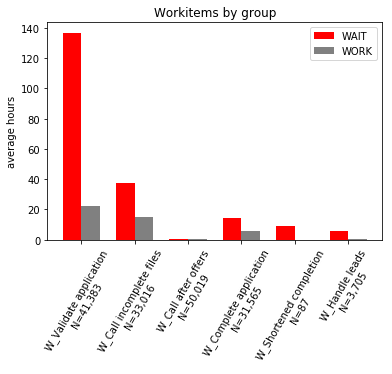

In [15]:
#Throughtput time DELAY vs EXECUTION TIME PER W* (2/2)
n = len(workitemsnames)
grouplen   = []
workhours  = []
delayhours = []
ticks      = []

for witem in workitemsnames:

    tmpdf = wdf[wdf['Activity'] == witem]

    grouplen.append(tmpdf.shape[0])     
    worksecs = tmpdf['Delta Exec'].dt.total_seconds().sum()  / grouplen[-1] 
    delaysecs = tmpdf['Delta Trans'].dt.total_seconds().sum() / grouplen[-1] 
        
    work =  util.seconds2hours( worksecs )
    delay = util.seconds2hours( delaysecs )

    workhours.append(work)
    delayhours.append(delay)
    ticks.append("%s\nN=%s"%(witem,"{:,}".format(grouplen[-1])))


#PLOTING EVERYTHING
fig, ax = plt.subplots()
width = 0.35       # the width of the bars
ind   = np.array(xrange(n))
rects1 = ax.bar(ind, delayhours, width=width,color='red')
rects2 = ax.bar(ind+width,  workhours, width=width,color='gray')

ax.set_ylabel('average hours')
ax.set_title('Workitems by group')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ticks,rotation=60)
ax.legend((rects1[0], rects2[0]), ('WAIT', 'WORK'))

plt.show()

In [16]:
#BREAKDOWN - Preparation
#Remove workitems from complete dataframe
breakdownindex = wdf.index.difference(workitemsdf.index)
breakdowndf = wdf.loc[breakdownindex,:]
print breakdowndf.shape[0] + workitemsdf.shape[0]

# breakdowndf = breakdowndf[ breakdowndf['Delta'] > threshold ] 
# print breakdowndf.shape[0]



368673


[[  3537848612000000 322817880703000000        31687000000
         31798000000     18749171000000 413212054212000000
    1699845118000000  51847483516000000       361057000000
         82353000000  65635008950000000    433111119000000
      66377320000000  12580519442000000]]
(14,)


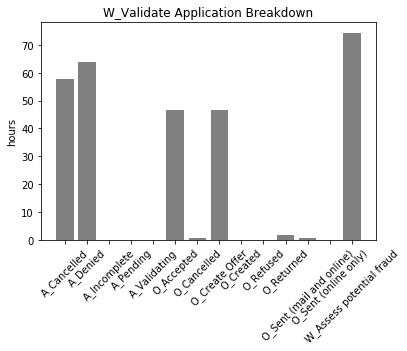

In [17]:
wvalidatedf = breakdowndf[breakdowndf['owner'] == 'W_Validate application']
sumdeltasdf = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=np.sum)
numdf       = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=len)
columns     = sumdeltasdf.columns

#wvalidatedf.to_csv('throughput_analysis_breakdown.csv',sep=',', encoding='utf-8')
print sumdeltasdf.values
print columns.shape

l = len(columns.tolist())

x =  (sumdeltasdf.values / np.timedelta64(1, 's'))/ numdf.values
# days, remainder = divmod(x, 3600*24)
# hours, remainder = divmod(remainder, 3600)
# minutes, seconds = divmod(remainder, 60)
# x = days + hours/24 + minutes/(24*60) + seconds
x = x.reshape((l,))

y= util.seconds2hours(x)


# # #Prevent zeros from polluting
# threshold =1
# ind = y > threshold
# xthresh = y[ind] 
# columnsthresh = columns[np.where(ind)]
xthresh = y
columnsthresh = columns
plt.title('W_Validate Application Breakdown')


plt.bar(range(len(columnsthresh)), xthresh.T, align='center', color='gray')
plt.xticks(range(len(columnsthresh)), columnsthresh,rotation=45)
plt.ylabel('hours')
plt.show()

In [18]:
wvalidatedf = breakdowndf[breakdowndf['owner'] == 'W_Call incomplete files']
sumdeltasdf = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=np.sum)
numdf       = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=len)
columns     = sumdeltasdf.columns

#wvalidatedf.to_csv('throughput_analysis_breakdown.csv',sep=',', encoding='utf-8')
print sumdeltasdf.values
print columns.shape

l = len(columns.tolist())

x =  (sumdeltasdf.values / np.timedelta64(1, 's'))/ numdf.values
# days, remainder = divmod(x, 3600*24)
# hours, remainder = divmod(remainder, 3600)
# minutes, seconds = divmod(remainder, 60)
# x = days + hours/24 + minutes/(24*60) + seconds
x = x.reshape((l,))

y= util.seconds2hours(x)


# # #Prevent zeros from polluting
# threshold =1
# ind = y > threshold
# xthresh = y[ind] 
# columnsthresh = columns[np.where(ind)]
xthresh = y
columnsthresh = columns
plt.title('W_Call incomplete files Breakdown')


plt.bar(range(len(columnsthresh)), xthresh.T, align='center', color='gray')
plt.xticks(range(len(columnsthresh)), columnsthresh,rotation=45)
plt.ylabel('hours')
plt.show()

[[623476971688000000   5031018163000000        71839000000
           156000000       143395000000  10968505570000000
   24116452524000000  49412228957000000       265506000000
          2014000000  25230115312000000      3937678000000
      58655681000000   3325083050000000]]
(14,)


[[23745998859000000        1193000000   536705258000000          10000000
         2772000000  1791965767000000   581719167000000       13183000000
          689000000      122277000000      185196000000   102158390000000]]
(12,)


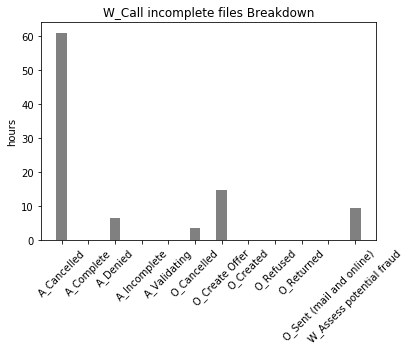

In [19]:
wvalidatedf = breakdowndf[breakdowndf['owner'] == 'W_Call after offers']
sumdeltasdf = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=np.sum)
numdf       = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=len)
columns     = sumdeltasdf.columns

#wvalidatedf.to_csv('throughput_analysis_breakdown.csv',sep=',', encoding='utf-8')
print sumdeltasdf.values
print columns.shape

l = len(columns.tolist())

x =  (sumdeltasdf.values / np.timedelta64(1, 's'))/ numdf.values
# days, remainder = divmod(x, 3600*24)
# hours, remainder = divmod(remainder, 3600)
# minutes, seconds = divmod(remainder, 60)
# x = days + hours/24 + minutes/(24*60) + seconds
x = x.reshape((l,))

y= util.seconds2hours(x)


# # #Prevent zeros from polluting
threshold =1
# ind = y > threshold
# xthresh = y[ind] 
# columnsthresh = columns[np.where(ind)]
xthresh = y
columnsthresh = columns
plt.title('W_Call incomplete files Breakdown')


plt.bar(range(len(columnsthresh)), xthresh.T, align='center', color='gray',width=0.4)
plt.xticks(range(len(columnsthresh)), columnsthresh,rotation=45)
plt.ylabel('hours')
plt.show()

[[531138175593000000   3070434460000000        65960000000
         55407000000     53863190000000     58828322000000
   75294505619000000     22558195000000          284000000
   26915899524000000    971770535000000    416050617000000]]
(12,)


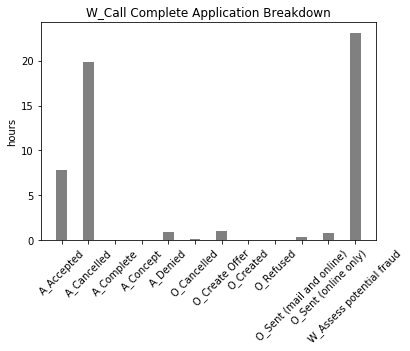

In [21]:
wvalidatedf = breakdowndf[breakdowndf['owner'] == 'W_Complete application']
sumdeltasdf = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=np.sum)
numdf       = pd.pivot_table(wvalidatedf, values=['Delta'],columns=['Activity'], aggfunc=len)
columns     = sumdeltasdf.columns

#wvalidatedf.to_csv('throughput_analysis_breakdown.csv',sep=',', encoding='utf-8')
print sumdeltasdf.values
print columns.shape

l = len(columns.tolist())

x =  (sumdeltasdf.values / np.timedelta64(1, 's'))/ numdf.values
# days, remainder = divmod(x, 3600*24)
# hours, remainder = divmod(remainder, 3600)
# minutes, seconds = divmod(remainder, 60)
# x = days + hours/24 + minutes/(24*60) + seconds
x = x.reshape((l,))

y= util.seconds2hours(x)


# # #Prevent zeros from polluting
threshold =1
ind = y > threshold
# xthresh = y[ind] 
# columnsthresh = columns[np.where(ind)]
xthresh = y
columnsthresh = columns
plt.title('W_Call Complete Application Breakdown')


plt.bar(range(len(columnsthresh)), xthresh.T, align='center', color='gray',width=0.4)
plt.xticks(range(len(columnsthresh)), columnsthresh,rotation=45)
plt.ylabel('hours')
plt.show()